<h2>
    Gap-filling on GPS data sets using iterative EOF and time series analysis
</h2>
    <h4>This for the East_NZ2009.csv data set.<br></h4>
    Libraries used-<br>
    numpy<br>
    pandas<br>
    os <br>
    matplotlib <br>
    eofs.standard <br>
    random <br><br>
    An iterative algorithm, EOF analysis, has been suggested the retrieve the missing values in CGPS data. Using the data, we first construct a spatial-temporal matrix. The missing values are then initialized appropriately. The method then decomposes the constructed matrix into different EOF modes. The optimum number of EOF modes are selected such that we are able to cover maximum variability in the data. The matrix is reconstructed using the number of modes calculated. An iterative update of missing values is performed, which gives the best estimate of missing data points. To verify the correctness of this method, 1-2% of the given data has been used as the cross-validation-set, to see if the missing values can be estimated correctly or not.
    
 <h6>
    The cross validation test is done at the end
 </h6>

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from eofs.standard import Eof 
import random
import time

In [2]:
df=pd.read_csv('East_NZ2009.csv', sep=',',header=None)       # reading the .csv files and converting to dataframe
east_matrix = np.array(df.to_numpy())                        #convert to numpy array
east_matrix = east_matrix.T                        # take transpose
m = len(east_matrix)                        #rows
n = len(east_matrix[0])                     #columns
east_matrix = np.nan_to_num(east_matrix)    #fill NaN with 0
org_matrix=east_matrix                        #store the current matrix as or
print(east_matrix)
print(m)
print(n)

[[  -4.13   -3.62   -3.97 ...   45.87   45.81   47.1 ]
 [   0.      0.      0.   ...   20.93   20.11   19.46]
 [  91.18   93.82   95.17 ... -137.53 -137.49 -136.58]
 ...
 [   0.      0.      0.   ...  228.64  229.2   230.53]
 [   0.      0.      0.   ...  -66.19  -66.97  -66.69]
 [   0.      0.      0.   ... -101.33 -100.89 -100.68]]
99
4291


In [3]:
"""
Subtracting the spatial mean from each column. The mean is stored in an array so that it can be added later
"""
l=[]
for j in range(n):
    sum=0.0
    count=0
    for i in range(m):
        sum+=east_matrix[i][j]
        count+=1
    sum/=count
    l.append(sum)
    for i in range(m):
        if(east_matrix[i][j]!=0):
            east_matrix[i][j]-=sum

In [4]:
"""
Example of reconstructing the matrix using 12 components
"""
solver = Eof(east_matrix) 
components=12
pcs=solver.pcs(pcscaling = 0 , npcs=components)
eofs=solver.eofs(eofscaling = 0, neofs=components)
new_matrix = np.matmul(pcs,eofs)  
print(new_matrix)

[[-48.5848848  -48.54741576 -48.57275405 ...  99.90147161  99.58836253
   99.80341608]
 [ -3.6553062   -3.12008263  -3.32874435 ...  73.3312275   73.15484367
   73.38873183]
 [ 36.14581544  35.58984589  36.04639022 ... -84.13218536 -83.94526463
  -83.96110547]
 ...
 [ -1.23360915  -1.46339503  -1.45331129 ... 283.23795627 282.63465703
  283.62697289]
 [ -9.1903738   -5.26136653  -8.07794489 ...  -6.61232727  -7.38226314
   -7.61154249]
 [ -9.25998385  -8.27488974  -8.91735121 ... -41.42499636 -41.94304398
  -41.88317319]]


In [5]:
eigenvalues =  solver.varianceFraction()
eigenvalue1 = solver.varianceFraction(neigs=99)

In [6]:
print(eigenvalue1.shape) #shape of numpy array for 99 components

(99,)


In [7]:
sum=0.0
for i in range(len(eigenvalue1)):
    sum+=eigenvalue1[i]
print(sum)   #total variance- will be 1.00

0.9999999999999996


In [8]:
"""
finding the % of variance explained by each component 
"""
for i in range(len(eigenvalue1)):  
    eigenvalue1[i]*=100
    eigenvalue1[i]/=sum
x=np.round(eigenvalue1,decimals=3)
print(x) # 10 components seems to be enough to cover the variance

[7.3034e+01 1.8357e+01 4.0750e+00 2.0330e+00 7.8900e-01 4.0500e-01
 2.6600e-01 2.0800e-01 1.8200e-01 1.0800e-01 7.3000e-02 5.5000e-02
 4.6000e-02 4.1000e-02 3.6000e-02 3.4000e-02 3.1000e-02 2.6000e-02
 1.9000e-02 1.7000e-02 1.6000e-02 1.4000e-02 1.3000e-02 1.0000e-02
 9.0000e-03 8.0000e-03 7.0000e-03 6.0000e-03 6.0000e-03 6.0000e-03
 5.0000e-03 4.0000e-03 4.0000e-03 4.0000e-03 3.0000e-03 3.0000e-03
 3.0000e-03 2.0000e-03 2.0000e-03 2.0000e-03 2.0000e-03 2.0000e-03
 2.0000e-03 2.0000e-03 2.0000e-03 2.0000e-03 2.0000e-03 1.0000e-03
 1.0000e-03 1.0000e-03 1.0000e-03 1.0000e-03 1.0000e-03 1.0000e-03
 1.0000e-03 1.0000e-03 1.0000e-03 1.0000e-03 1.0000e-03 1.0000e-03
 1.0000e-03 1.0000e-03 1.0000e-03 1.0000e-03 1.0000e-03 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000

7.8187468950410945


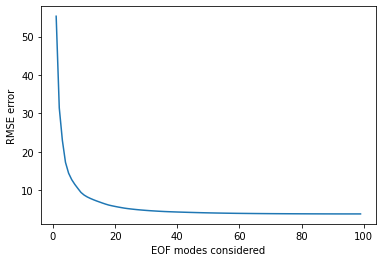

In [9]:
"""
plotting the RMSE error  after constructing the matrix with k components vs the number of EOF modes considered
"""
x_components=[]
y_error=[]
for k in range(99):
    totalerror=0.0
    pcs=solver.pcs(pcscaling = 0 , npcs=k+1)
    eofs=solver.eofs(eofscaling = 0, neofs=k+1)
    new_matrix = np.matmul(pcs,eofs)  
    for i in range(m):
        for j in range(n):
            totalerror+=(east_matrix[i][j]-new_matrix[i][j])**2
    x_components.append(k+1)
    y_error.append((totalerror/(m*n))**0.5)
plt.xlabel("EOF modes considered")
plt.ylabel("RMSE error")
plt.plot(x_components,y_error)
print(y_error[11])            #error for 12 components

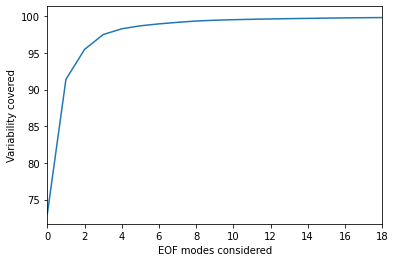

In [10]:
"""
plotting the variance expressed vs the no. of EOF modes considered
"""
variance_covered=0.0
y=[]
x=[]
for i in range(m):
    variance_covered+=eigenvalue1[i]
    y.append(variance_covered)
    x.append(i)
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
scale_factor=18
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.xlabel("EOF modes considered")
plt.ylabel("Variability covered")
plt.plot(x,y)
#plot of variance covered v/s the number of components taken. we see graph flats out at approx 10-15 components.
#so we'll fix number of components to 12

In [11]:
print(east_matrix) #after subtracting the spatial mean from the original matrix

[[-38.21474747 -38.33474747 -38.24767677 ...  95.14757576  94.40323232
   95.01909091]
 [  0.           0.           0.         ...  70.20757576  68.70323232
   67.37909091]
 [ 57.09525253  59.10525253  60.89232323 ... -88.25242424 -88.89676768
  -88.66090909]
 ...
 [  0.           0.           0.         ... 277.91757576 277.79323232
  278.44909091]
 [  0.           0.           0.         ... -16.91242424 -18.37676768
  -18.77090909]
 [  0.           0.           0.         ... -52.05242424 -52.29676768
  -52.76090909]]


In [12]:
"""
Refining the matrix obtained after reconstructing with 12 EOF modes.
beta value (value for convergence) has been set to 1e-6. 
You can decrease it if you want a more refined value
"""
temp_matrix=org_matrix
comp_considered=12
start=time.time()
for k in range(comp_considered):
    while(1):
        solver=Eof(temp_matrix)
        pcs=solver.pcs(pcscaling=0,npcs=k+1)
        eofs=solver.eofs(eofscaling=0,neofs=k+1)
        x_ = np.matmul(pcs,eofs)
        for i in range(m):
            for j in range(n):
                if(org_matrix[i][j] != 0):
                    x_[i][j]=org_matrix[i][j]
        error=x_ - temp_matrix
        error=np.square(error)
        var1=np.sum(error)
        error2=np.square(x_)
        var2=np.sum(error2)
        temp_matrix=x_
        #print(k+1, var1/var2)
        if(var1/var2 < 0.000001):
            break
end=time.time()
print(temp_matrix)

[[ -38.21474747  -38.33474747  -38.24767677 ...   95.14757576
    94.40323232   95.01909091]
 [ -24.55228123  -23.40956486  -24.16569681 ...   70.20757576
    68.70323232   67.37909091]
 [  57.09525253   59.10525253   60.89232323 ...  -88.25242424
   -88.89676768  -88.66090909]
 ...
 [-195.58001299 -197.06144474 -197.10607136 ...  277.91757576
   277.79323232  278.44909091]
 [ 300.72650227  298.99167634  300.44909664 ...  -16.91242424
   -18.37676768  -18.77090909]
 [ 325.77929225  325.04603218  325.80648714 ...  -52.05242424
   -52.29676768  -52.76090909]]


In [13]:
print("Run time is:",end-start, "seconds")

Run time is: 280.2284324169159 seconds


In [14]:
print(org_matrix) #orginal matrix with missing values

[[-38.21474747 -38.33474747 -38.24767677 ...  95.14757576  94.40323232
   95.01909091]
 [  0.           0.           0.         ...  70.20757576  68.70323232
   67.37909091]
 [ 57.09525253  59.10525253  60.89232323 ... -88.25242424 -88.89676768
  -88.66090909]
 ...
 [  0.           0.           0.         ... 277.91757576 277.79323232
  278.44909091]
 [  0.           0.           0.         ... -16.91242424 -18.37676768
  -18.77090909]
 [  0.           0.           0.         ... -52.05242424 -52.29676768
  -52.76090909]]


In [15]:
for i in range(m):
    for j in range(n):
        temp_matrix[i][j]+=l[j]
print(temp_matrix) #reconstructed and refined dataset after applying iterative EOF analysis

[[  -4.13         -3.62         -3.97       ...   45.87
    45.81         47.1       ]
 [   9.53246624   11.30518262   10.11197996 ...   20.93
    20.11         19.46      ]
 [  91.18         93.82         95.17       ... -137.53
  -137.49       -136.58      ]
 ...
 [-161.49526551 -162.34669727 -162.82839459 ...  228.64
   229.2         230.53      ]
 [ 334.81124974  333.70642382  334.7267734  ...  -66.19
   -66.97        -66.69      ]
 [ 359.86403973  359.76077965  360.0841639  ... -101.33
  -100.89       -100.68      ]]


<h2> The assignment ends here.</h2>
<h4>
    Below is a test on the cross validation set showing the correctness of the EOF based gap filling method.
</h4>


   A submatrix of size 10 * 10 is taken from the original data set and 10 values are randomly set to 0.
   Number of ideal components are select to express maximum variance.
   The iterative refinement is done and finally the obtained values are compared with the original values.

-beta is set to 1e-06<br>
-number of components to cover maximum variance is taken to be 8

In [24]:
cross_valid_set=np.zeros((10,10))
new_org_matrix=np.zeros((10,10))
t=[]
for i in range(10):
    for j in range(10):
        cross_valid_set[i][j]=org_matrix[i][j]
        new_org_matrix[i][j]=org_matrix[i][j]
l=[]

for i in range(10):
    a=random.randint(0,4)
    b=random.randint(0,4)
    t.append((a,b))
    new_org_matrix[a][b]=0
    cross_valid_set[a][b]=0
for j in range(10):
    sum=0.0
    count=0
    for i in range(10):
        sum+=cross_valid_set[i][j]
        count+=1
    sum/=count
    l.append(sum)
    for i in range(10):
        if(cross_valid_set[i][j]!=0):
            cross_valid_set[i][j]-=sum
print(cross_valid_set)

[[   0.          -52.12089899  -39.59660606  -57.89748485    0.
   -62.71178788  -64.30439394  -64.68263636  -64.55618182  -63.13230303]
 [   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.        ]
 [  33.92462626   45.31910101    0.           45.07251515   36.01062626
    28.93821212   36.65560606   27.78736364   31.01381818   38.39769697]
 [  90.85462626    0.            0.           94.93251515   84.60062626
    89.85821212   89.93560606   87.75736364   88.89381818   88.14769697]
 [   0.           43.18910101    0.            0.           29.84062626
    29.26821212   41.82560606   44.88736364   33.45381818   33.00769697]
 [   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.        ]
 [ 166.86462626  176.29910101  188.05339394  168.31251515  159.09062626
   165.66821212  162.46560606  162.98736364  165.37381818  166.09769697]
 [  52.14

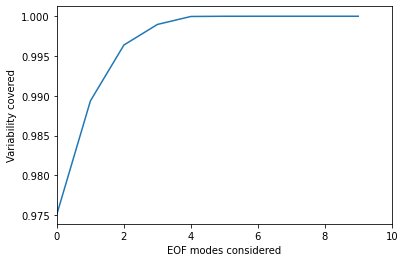

In [25]:
solver=Eof(cross_valid_set)
eigenvalues =  solver.varianceFraction()
eigenvalue1 = solver.varianceFraction(neigs=99)
variance_covered=0.0
y=[]
x=[]
for i in range(len(eigenvalue1)):
    variance_covered+=eigenvalue1[i]
    y.append(variance_covered)
    x.append(i)
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
scale_factor=10
plt.xlim(xmin * scale_factor, xmax * scale_factor)
plt.xlabel("EOF modes considered")
plt.ylabel("Variability covered")
plt.plot(x,y)

In [26]:
temp_matrix= cross_valid_set
comp_considered=8
for k in range(comp_considered):
    while(1):
        solver=Eof(temp_matrix)
        pcs=solver.pcs(pcscaling=0,npcs=k+1)
        eofs=solver.eofs(eofscaling=0,neofs=k+1)
        x_ = np.matmul(pcs,eofs)
        for i in range(10):
            for j in range(10):
                if(new_org_matrix[i][j] != 0):
                    x_[i][j]=new_org_matrix[i][j]
        error=x_ - temp_matrix
        error=np.square(error)
        var1=np.sum(error)
        error2=np.square(x_)
        var2=np.sum(error2)
        temp_matrix=x_
        #print(k+1, var1/var2)
        #print(x_[10][35])
        
        if(var1/var2 < 0.000001):
            break
print(temp_matrix)

[[ -38.86114283  -38.33474747  -38.24767677  -39.04121212  -38.18332599
   -39.07262626  -37.87131313  -38.59212121  -40.12727273  -38.63434343]
 [ -85.55452745  -83.68948387  -82.05429533  -80.6862173   -82.65528687
   -78.92093857  -87.93080336  -87.15284391  -81.57633968  -81.7139463 ]
 [  57.09525253   59.10525253   62.06850562   63.92878788   64.62656566
    52.57737374   63.08868687   53.87787879   55.44272727   62.89565657]
 [ 114.02525253  113.77142036  113.38396125  113.78878788  113.21656566
   113.49737374  116.36868687  113.84787879  113.32272727  112.64565657]
 [  64.0266362    56.97525253   57.25591766   53.16531839   58.45656566
    52.90737374   68.25868687   70.97787879   57.88272727   57.50565657]
 [ -85.55452745  -83.68948387  -82.05429533  -80.6862173   -82.65528687
   -78.92093857  -87.93080336  -87.15284391  -81.57633968  -81.7139463 ]
 [ 190.03525253  190.08525253  189.40232323  187.16878788  187.70656566
   189.30737374  188.89868687  189.07787879  189.80272727 

In [27]:
for i in range(len(t)):
    if(org_matrix[t[i][0]][t[i][1]]!=0): #don't consider values which were missing in the original data set.
        print(org_matrix[t[i][0]][t[i][1]]+l[t[i][1]] , temp_matrix[t[i][0]][t[i][1]]+l[t[i][1]])

-15.044121212121208 -15.690516564978441
126.42140404040403 127.55757187531594
88.3958787878788 87.19726245932044
62.24125252525252 63.4174349081136
116.1112525252525 114.73289054057531
-10.85749494949497 -9.5673865963103
63.93125252525252 58.60484694931097
76.87506060606061 72.02159112164412
